## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

In [ ]:
%pip install wbgapi

In [ ]:
# 1. Instalación de la librería (se ejecuta una sola vez)
!pip -q install wbgapi

# 2. Importaciones de librerías
import wbgapi as wb
import pandas as pd
import numpy as np

# 3. Definición de la función de descarga (la "máquina")
def descargar_en_chunks(indicadores, anos, chunk_size=15):
    keys = list(indicadores.keys())
    n = len(keys)
    dfs = []

    for i in range(0, n, chunk_size):
        bloque = keys[i:i+chunk_size]
        print(f"Descargando bloque {i//chunk_size + 1}: {bloque}")

        # Conexión al Banco Mundial y descarga
        df_temp = wb.data.DataFrame(
            series=bloque,
            time=anos,
            labels=True
        )
        dfs.append(df_temp)

    # Unir todos los dataframes descargados
    df_final = pd.concat(dfs, axis=1)

    # Eliminar columnas duplicadas
    df_final = df_final.loc[:, ~df_final.columns.duplicated()]

    # Resetear índice y renombrar columnas
    df_final = df_final.reset_index().rename(columns={'economy': 'country', 'time': 'year'})

    # Eliminar filas donde el PIB sea nulo
    df_final = df_final.dropna(subset=['NY.GDP.MKTP.PP.KD'])

    return df_final

# 4. Configuración de datos deseados
indicadores = {
    'NY.GDP.MKTP.PP.KD': 'PIB real (PPP, constant)',
    'SL.UEM.TOTL.ZS': 'Desempleo total (%)'
}
anos = range(2000, 2024) # Rango desde el año 2000 hasta 2023

# 5. EJECUCIÓN: Crear la base de datos
# En este punto el código se conecta a Internet y crea la tabla en memoria
df = descargar_en_chunks(indicadores, anos)

# 6. Verificación de resultados
print("\n--- Vista previa de la base de datos ---")
print(df.head()) # Muestra las primeras 5 filas
print("\n--- Tamaño de la tabla (filas, columnas) ---")
print(df.shape)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SL.UEM.TOTL.ZS']


KeyError: ['NY.GDP.MKTP.PP.KD']

In [ ]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/UDP-CcsDatos2025-2')

import my_func as fn

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [ ]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [ ]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [ ]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [ ]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [ ]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,2.052982,...,NaN,NaN,65.013,62.775,60.226,NaN,NaN,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,4.040607,...,NaN,NaN,68.673,66.349,63.936,NaN,NaN,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.769072,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.496492,...,36.077468,29.637136,79.264,74.588,69.877,NaN,NaN,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.942088,...,NaN,NaN,73.927,71.477,69.445,NaN,NaN,NaN,NaN,45.7313


In [3]:
pip install wbgapi

In [18]:
import wbgapi as wb
import pandas as pd
import numpy as np

# Redefiniendo indicadores e iso_list para asegurar que estén disponibles en este contexto
# (Fueron definidos en celdas anteriores pero podrían no estar en el ámbito si las celdas anteriores fallaron)
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)"
}

# Seleccionar solo países usando códigos ISO (de la celda ggk6Ifi6e3vB)
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])


# Función corregida para descargar datos de un solo año en formato amplio
def descargar_wb_data_single_year_wide(indicators_dict, target_year, chunk_size=10):
    indicator_codes = list(indicators_dict.keys())
    all_df_chunks = []

    for i in range(0, len(indicator_codes), chunk_size):
        current_chunk_indicators = indicator_codes[i:i + chunk_size]
        print(f"Descargando bloque {int(i/chunk_size) + 1}: {current_chunk_indicators}")

        # wb.data.DataFrame con una lista de series y un solo tiempo devuelve los indicadores como columnas
        df_chunk = wb.data.DataFrame(
            series=current_chunk_indicators,
            time=target_year,
            labels=True # Esto añade 'Country' (nombre del país) a cada chunk
        )
        all_df_chunks.append(df_chunk)

    if not all_df_chunks:
        return pd.DataFrame()

    # Concatenar todos los dataframes horizontalmente. Todos deben tener el mismo índice (economy, time)
    # y diferentes columnas de indicadores.
    df_final = pd.concat(all_df_chunks, axis=1)

    # Eliminar columnas duplicadas (como 'Country' que podría aparecer si labels=True se aplica a cada chunk y luego se concatena)
    df_final = df_final.loc[:, ~df_final.columns.duplicated()]

    # Reiniciar el índice para convertir 'economy' (código de país) y 'time' (año) en columnas
    df_final = df_final.reset_index()

    # Renombrar columnas para consistencia
    df_final = df_final.rename(columns={'economy': 'country_code', 'time': 'year'})

    # Filtrar filas donde la variable objetivo es NaN (PIB es nulo) según la instrucción inicial
    if 'NY.GDP.MKTP.PP.KD' in df_final.columns:
        df_final = df_final.dropna(subset=['NY.GDP.MKTP.PP.KD'])
    else:
        print("Advertencia: La columna 'NY.GDP.MKTP.PP.KD' no se encontró en los datos descargados. No se pueden eliminar NaNs basados en el objetivo.")

    return df_final

# 1. Descargar los datos para el año 2023 en df_wb_raw
target_year = 2023
df_wb_raw = descargar_wb_data_single_year_wide(indicadores_wb, target_year=target_year, chunk_size=10)

# 2. Filtrar el DataFrame para incluir solo países no agregados (iso_list)
df_wb_raw = df_wb_raw[df_wb_raw['country_code'].isin(iso_list)].reset_index(drop=True)

# 3. Discretizar la variable objetivo 'NY.GDP.MKTP.PP.KD' según las instrucciones
if 'NY.GDP.MKTP.PP.KD' in df_wb_raw.columns:
    # Asegurarse de que la columna sea numérica antes de aplicar qcut, forzando los errores a NaN
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.to_numeric(df_wb_raw['NY.GDP.MKTP.PP.KD'], errors='coerce')
    # Eliminar cualquier nuevo NaN que pueda haber resultado de la coerción antes de qcut
    df_wb_raw.dropna(subset=['NY.GDP.MKTP.PP.KD'], inplace=True)

    if not df_wb_raw['NY.GDP.MKTP.PP.KD'].empty:
        df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(
            df_wb_raw['NY.GDP.MKTP.PP.KD'],
            q=5,
            labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']
        )
    else:
        print("Advertencia: 'NY.GDP.MKTP.PP.KD' quedó vacía después de la limpieza/coerción. Omitiendo qcut.")
else:
    print("Advertencia: La columna 'NY.GDP.MKTP.PP.KD' no se encontró, no se puede aplicar qcut.")

# --- Ahora, realizar el análisis descriptivo como se solicita en la subtarea ---
print("\n--- Primeras 5 filas del DataFrame ---")
print(df_wb_raw.head())

print("\n--- Información del DataFrame ---")
df_wb_raw.info()

print("\n--- Forma del DataFrame (filas, columnas) ---")
print(df_wb_raw.shape)

print("\n--- Número de países únicos ---")
# La columna 'Country' contiene los nombres de los países, y 'country_code' contiene los códigos ISO
print(df_wb_raw['Country'].nunique())

print("\n--- Estadísticas descriptivas para variables numéricas ---")
# Excluir columnas no numéricas y columnas de identificación de describe()
numerical_cols = df_wb_raw.select_dtypes(include=np.number).columns.tolist()
# 'year' es constante (2023) y 'country_code' es un identificador, así que se eliminan de las estadísticas numéricas
if 'year' in numerical_cols: numerical_cols.remove('year')
print(df_wb_raw[numerical_cols].describe())

print("\n--- Conteo de valores para la variable objetivo 'NY.GDP.MKTP.PP.KD' ---")
print(df_wb_raw['NY.GDP.MKTP.PP.KD'].value_counts())

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

## Handle Missing Data

### Subtask:
Calculate the percentage of missing values for each variable. Drop columns with 15% or more missing data. For columns with less than 15% missing data, impute numerical variables with the median and categorical variables with the mode.


**Reasoning**:
The first step is to calculate the percentage of missing values for each column in the `df_wb_raw` DataFrame to determine which columns need to be dropped or imputed.



In [19]:
missing_percentage = df_wb_raw.isnull().sum() * 100 / len(df_wb_raw)
print("--- Porcentaje de valores faltantes por columna ---")
print(missing_percentage.sort_values(ascending=False).head(20))

--- Porcentaje de valores faltantes por columna ---
SE.PRM.NENR.FE          100.000000
SE.PRM.NENR.MA          100.000000
SE.PRM.NENR             100.000000
GC.TAX.EXPT.ZS           83.333333
GC.TAX.EXPT.CN           83.333333
GC.DOD.TOTL.CN           82.828283
GC.DOD.TOTL.GD.ZS        82.828283
IT.NET.USER.FE.ZS        71.212121
IT.NET.USER.MA.ZS        71.212121
EG.ELC.LOSS.ZS           64.646465
EG.USE.ELEC.KH.PC        64.141414
SL.UEM.TOTL.FE.NE.ZS     46.969697
SL.UEM.TOTL.NE.ZS        46.969697
SL.UEM.TOTL.MA.NE.ZS     46.969697
SE.TER.ENRR.MA           38.383838
SE.TER.ENRR.FE           38.383838
SE.TER.ENRR              37.878788
SE.SEC.ENRR.MA           32.323232
SE.SEC.ENRR.FE           31.818182
SE.SEC.ENRR              30.303030
dtype: float64


**Reasoning**:
Based on the calculated missing percentages, identify columns with 15% or more missing values and drop them from the DataFrame as per the subtask instructions.



In [20]:
cols_to_drop_high_nan = missing_percentage[missing_percentage >= 15].index.tolist()
# Excluir 'NY.GDP.MKTP.PP.KD' de ser eliminada si está en la lista, ya que es la variable objetivo y ya ha sido manejada.
if 'NY.GDP.MKTP.PP.KD' in cols_to_drop_high_nan:
    cols_to_drop_high_nan.remove('NY.GDP.MKTP.PP.KD')
df_wb_raw = df_wb_raw.drop(columns=cols_to_drop_high_nan)
print(f"Se eliminaron {len(cols_to_drop_high_nan)} columnas con >= 15% de valores faltantes.")
print("Forma actual del DataFrame:", df_wb_raw.shape)

Se eliminaron 26 columnas con >= 15% de valores faltantes.
Forma actual del DataFrame: (198, 41)


**Reasoning**:
Now that columns with high percentages of missing values have been dropped, the next step is to impute the remaining missing values in numerical columns with the median and in categorical columns with the mode, as per the subtask instructions.



In [21]:
print("--- Imputando valores faltantes restantes ---")

# Identificar columnas numéricas y categóricas para la imputación
missing_numerical_cols = df_wb_raw.select_dtypes(include=np.number).columns[df_wb_raw.select_dtypes(include=np.number).isnull().any()].tolist()
missing_categorical_cols = df_wb_raw.select_dtypes(include=['object', 'category']).columns[df_wb_raw.select_dtypes(include=['object', 'category']).isnull().any()].tolist()

# Imputar columnas numéricas con la mediana
for col in missing_numerical_cols:
    median_val = df_wb_raw[col].median()
    df_wb_raw[col].fillna(median_val, inplace=True)
    print(f"Columna numérica '{col}' imputada con la mediana: {median_val}")

# Imputar columnas categóricas con la moda
for col in missing_categorical_cols:
    # La moda podría devolver múltiples valores si hay un empate, así que se toma el primero.
    mode_val = df_wb_raw[col].mode()[0]
    df_wb_raw[col].fillna(mode_val, inplace=True)
    print(f"Columna categórica '{col}' imputada con la moda: {mode_val}")

print("\n--- Verificando que no hay más valores faltantes ---")
print(df_wb_raw.isnull().sum().sum())

print("\n--- Información del DataFrame después de la imputación ---")
df_wb_raw.info()

--- Imputando valores faltantes restantes ---
Columna numérica 'SL.TLF.TOTL.FE.ZS' imputada con la mediana: 45.0819446527757
Columna numérica 'SL.TLF.TOTL.IN' imputada con la mediana: 4220673.0
Columna numérica 'SL.UEM.TOTL.FE.ZS' imputada con la mediana: 5.532
Columna numérica 'SL.UEM.TOTL.MA.ZS' imputada con la mediana: 4.608
Columna numérica 'SP.RUR.TOTL.ZG' imputada con la mediana: 0.415638967378448
Columna numérica 'FP.CPI.TOTL.ZG' imputada con la mediana: 5.87110177678988
Columna numérica 'NE.EXP.GNFS.ZS' imputada con la mediana: 37.8166476493913
Columna numérica 'NV.AGR.TOTL.CD' imputada con la mediana: 3465342538.48272
Columna numérica 'NV.AGR.TOTL.CN' imputada con la mediana: 39711718990.7585
Columna numérica 'NV.IND.MANF.CD' imputada con la mediana: 4795876698.625574
Columna numérica 'SL.UEM.TOTL.ZS' imputada con la mediana: 5.094
Columna numérica 'GE.EST' imputada con la mediana: -0.0595627073198557
Columna numérica 'NV.IND.MANF.CN' imputada con la mediana: 113027246500.0
Co

/tmp/ipython-input-1516975321.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





**Reasoning**:
Now that all missing values have been handled, the next step in the descriptive analysis is to identify outliers in the numerical variables as per the subtask instructions. This will be done using the Interquartile Range (IQR) method.



In [22]:
print("--- Identificando Outliers (Método IQR) ---")

numerical_cols = df_wb_raw.select_dtypes(include=np.number).columns.tolist()

outliers_found = {}

for col in numerical_cols:
    Q1 = df_wb_raw[col].quantile(0.25)
    Q3 = df_wb_raw[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    col_outliers = df_wb_raw[(df_wb_raw[col] < lower_bound) | (df_wb_raw[col] > upper_bound)]

    if not col_outliers.empty:
        outliers_found[col] = len(col_outliers)
        print(f"Columna '{col}': {len(col_outliers)} outliers detectados.")

if not outliers_found:
    print("No se detectaron outliers significativos en las columnas numéricas según el método IQR.")
else:
    print("\nResumen de outliers detectados:")
    for col, count in outliers_found.items():
        print(f"- {col}: {count} outliers")

--- Identificando Outliers (Método IQR) ---
Columna 'SP.POP.GROW': 8 outliers detectados.
Columna 'SP.POP.TOTL': 20 outliers detectados.
Columna 'SP.POP.TOTL.FE.IN': 22 outliers detectados.
Columna 'SP.POP.TOTL.FE.ZS': 19 outliers detectados.
Columna 'SP.POP.TOTL.MA.IN': 20 outliers detectados.
Columna 'SP.POP.TOTL.MA.ZS': 19 outliers detectados.
Columna 'SP.URB.GROW': 3 outliers detectados.
Columna 'SP.URB.TOTL': 25 outliers detectados.
Columna 'SL.TLF.TOTL.FE.ZS': 20 outliers detectados.
Columna 'SL.TLF.TOTL.IN': 29 outliers detectados.
Columna 'SL.UEM.TOTL.FE.ZS': 17 outliers detectados.
Columna 'SL.UEM.TOTL.MA.ZS': 16 outliers detectados.
Columna 'SP.RUR.TOTL': 22 outliers detectados.
Columna 'SP.RUR.TOTL.ZG': 9 outliers detectados.
Columna 'FP.CPI.TOTL.ZG': 21 outliers detectados.
Columna 'NE.EXP.GNFS.ZS': 11 outliers detectados.
Columna 'NV.AGR.TOTL.CD': 29 outliers detectados.
Columna 'NV.AGR.TOTL.CN': 38 outliers detectados.
Columna 'NV.IND.MANF.CD': 35 outliers detectados.
Col

**Reasoning**:
The next step is to visualize the distribution of the discretized target variable 'NY.GDP.MKTP.PP.KD' using a bar chart, as specified in the subtask. This will provide insights into the balance and distribution of the GDP categories.



--- Visualizando la distribución de 'NY.GDP.MKTP.PP.KD' (PIB Discretizado) ---


/tmp/ipython-input-2701477741.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




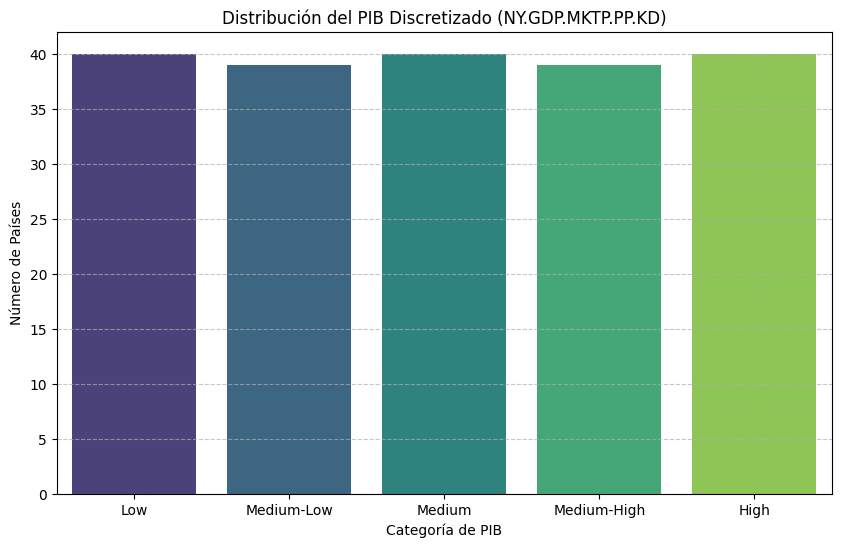

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Visualizando la distribución de 'NY.GDP.MKTP.PP.KD' (PIB Discretizado) ---")

plt.figure(figsize=(10, 6))
sns.countplot(data=df_wb_raw, x='NY.GDP.MKTP.PP.KD', palette='viridis', order=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
plt.title('Distribución del PIB Discretizado (NY.GDP.MKTP.PP.KD)')
plt.xlabel('Categoría de PIB')
plt.ylabel('Número de Países')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
The previous code block generated a `FutureWarning` from seaborn regarding the use of `palette` without `hue` in `countplot`. To fix this and ensure compatibility with future seaborn versions, I will explicitly set `hue` to the same variable as `x` and set `legend=False` as suggested by the warning.



--- Visualizando la distribución de 'NY.GDP.MKTP.PP.KD' (PIB Discretizado) ---


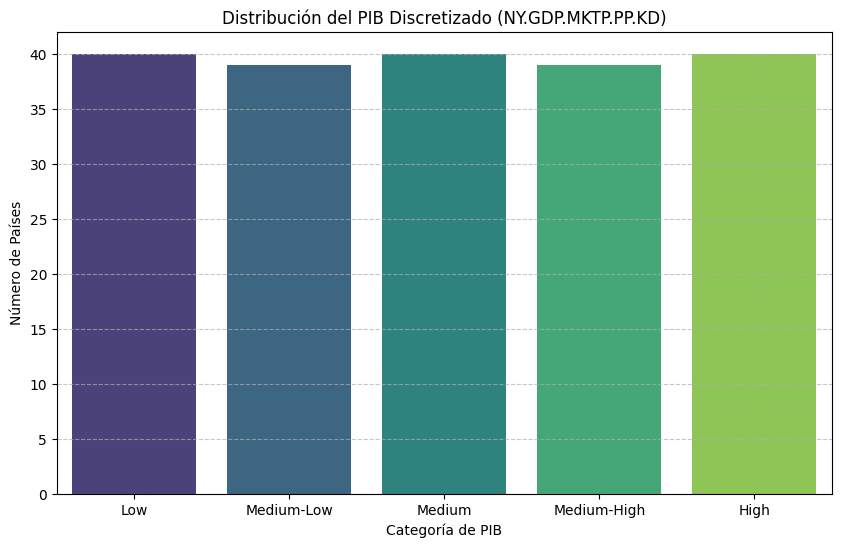

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Visualizando la distribución de 'NY.GDP.MKTP.PP.KD' (PIB Discretizado) ---")

plt.figure(figsize=(10, 6))
sns.countplot(data=df_wb_raw, x='NY.GDP.MKTP.PP.KD', hue='NY.GDP.MKTP.PP.KD', palette='viridis', order=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'], legend=False)
plt.title('Distribución del PIB Discretizado (NY.GDP.MKTP.PP.KD)')
plt.xlabel('Categoría de PIB')
plt.ylabel('Número de Países')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
The final visualization requested by the subtask is a choropleth map showing the geographical distribution of the discretized GDP. This step will use `plotly.express` to create an interactive map, mapping the `country_code` to show the 'NY.GDP.MKTP.PP.KD' categories.



In [25]:
import plotly.express as px

print("--- Creando un Mapa Coroplético para la Distribución del PIB Discretizado ---")

fig = px.choropleth(
    df_wb_raw,
    locations="country_code",
    color="NY.GDP.MKTP.PP.KD",
    hover_name="Country",
    color_discrete_map={
        'Low': 'red',
        'Medium-Low': 'orange',
        'Medium': 'yellow',
        'Medium-High': 'lightgreen',
        'High': 'darkgreen'
    },
    category_orders={"NY.GDP.MKTP.PP.KD": ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']},
    title='Distribución Geográfica del PIB Discretizado (2023)',
    projection='natural earth'
)
fig.show()

--- Creando un Mapa Coroplético para la Distribución del PIB Discretizado ---


### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


# Task
Select and standardize numerical variables from `df_wb_raw`, excluding 'country_code', 'Country', and 'NY.GDP.MKTP.PP.KD'. Apply PCA to the standardized data and analyze the explained variance. Plot the cumulative explained variance. Determine the optimal number of components to explain 70-90% of the variance, justifying the selection. Finally, construct a new DataFrame containing these principal components along with 'country_code', 'Country', and the discretized target variable 'NY.GDP.MKTP.PP.KD'. Summarize the PCA results and the chosen components.

In [29]:
from sklearn.model_selection import train_test_split

print("--- Preparando datos para la modelación: Dividiendo en conjuntos de entrenamiento y prueba ---")

# Definir las características (X) y la variable objetivo (y)
# Excluir 'country_code', 'Country' ya que son identificadores y no características para el modelo
X = df_pca.drop(columns=['country_code', 'Country', 'NY.GDP.MKTP.PP.KD'])
y = df_pca['NY.GDP.MKTP.PP.KD']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
# Se utiliza `stratify=y` para asegurar que las proporciones de las clases del PIB sean las mismas en ambos conjuntos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensiones de los conjuntos de datos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print("\nDistribución de la variable objetivo en el conjunto original:")
print(y.value_counts(normalize=True))

print("\nDistribución de la variable objetivo en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de la variable objetivo en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

--- Preparando datos para la modelación: Dividiendo en conjuntos de entrenamiento y prueba ---
Dimensiones de los conjuntos de datos:
X_train: (158, 7)
X_test: (40, 7)
y_train: (158,)
y_test: (40,)

Distribución de la variable objetivo en el conjunto original:
NY.GDP.MKTP.PP.KD
Low            0.20202
Medium         0.20202
High           0.20202
Medium-Low     0.19697
Medium-High    0.19697
Name: proportion, dtype: float64

Distribución de la variable objetivo en el conjunto de entrenamiento:
NY.GDP.MKTP.PP.KD
Low            0.202532
Medium         0.202532
High           0.202532
Medium-Low     0.196203
Medium-High    0.196203
Name: proportion, dtype: float64

Distribución de la variable objetivo en el conjunto de prueba:
NY.GDP.MKTP.PP.KD
Low            0.2
Medium-Low     0.2
Medium         0.2
Medium-High    0.2
High           0.2
Name: proportion, dtype: float64


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

print("--- Aplicando y Evaluando Algoritmos de Clasificación ---")

# --- Modelo 1: Regresión Logística ---
print("\nEntrenando Modelo de Regresión Logística...")
logistic_model = LogisticRegression(random_state=42, max_iter=1000) # Aumentar max_iter si no converge
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Precisión de la Regresión Logística: {accuracy_logistic:.4f}")

# --- Modelo 2: Random Forest ---
print("\nEntrenando Modelo Random Forest...")
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del Random Forest: {accuracy_rf:.4f}")

print("\nAlgoritmos de clasificación aplicados y evaluados inicialmente.")

--- Aplicando y Evaluando Algoritmos de Clasificación ---

Entrenando Modelo de Regresión Logística...
Precisión de la Regresión Logística: 0.4500

Entrenando Modelo Random Forest...
Precisión del Random Forest: 0.3500

Algoritmos de clasificación aplicados y evaluados inicialmente.


--- Evaluando el Rendimiento de los Modelos ---

--- Reporte de Clasificación para Regresión Logística ---
              precision    recall  f1-score   support

        High       1.00      0.50      0.67         8
         Low       0.20      0.25      0.22         8
      Medium       0.50      0.38      0.43         8
 Medium-High       0.42      0.62      0.50         8
  Medium-Low       0.50      0.50      0.50         8

    accuracy                           0.45        40
   macro avg       0.52      0.45      0.46        40
weighted avg       0.52      0.45      0.46        40


--- Matriz de Confusión para Regresión Logística ---


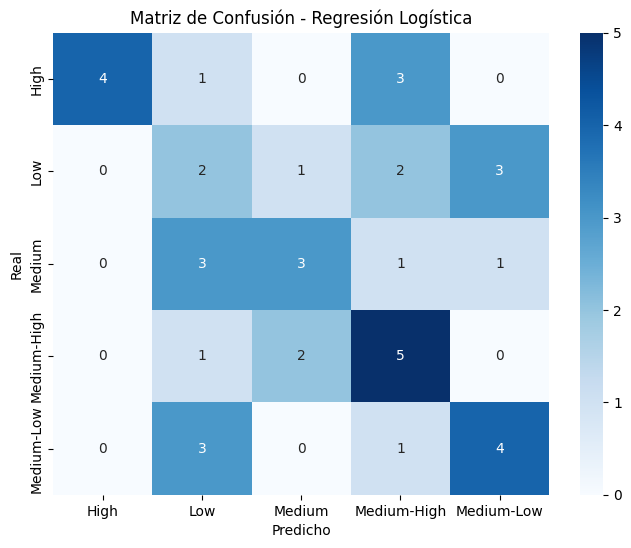


--- Reporte de Clasificación para Random Forest ---
              precision    recall  f1-score   support

        High       1.00      0.62      0.77         8
         Low       0.25      0.25      0.25         8
      Medium       0.00      0.00      0.00         8
 Medium-High       0.33      0.50      0.40         8
  Medium-Low       0.38      0.38      0.38         8

    accuracy                           0.35        40
   macro avg       0.39      0.35      0.36        40
weighted avg       0.39      0.35      0.36        40


--- Matriz de Confusión para Random Forest ---


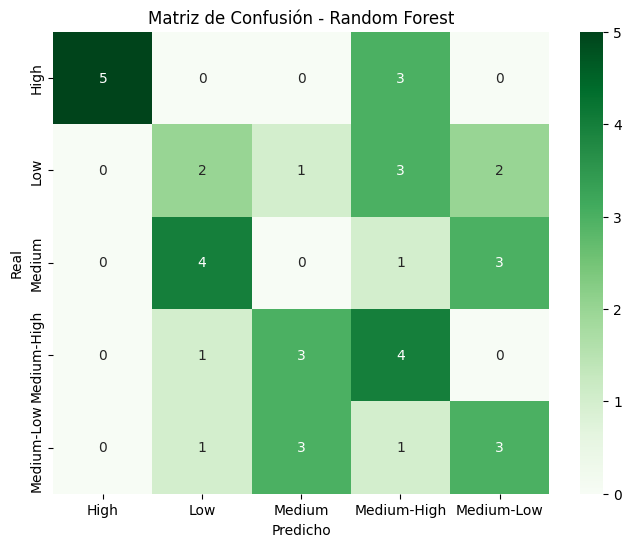


Evaluación completa de los modelos realizada.


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Evaluando el Rendimiento de los Modelos ---")

# --- Evaluación de Regresión Logística ---
print("\n--- Reporte de Clasificación para Regresión Logística ---")
print(classification_report(y_test, y_pred_logistic))

print("\n--- Matriz de Confusión para Regresión Logística ---")
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# --- Evaluación de Random Forest ---
print("\n--- Reporte de Clasificación para Random Forest ---")
print(classification_report(y_test, y_pred_rf))

print("\n--- Matriz de Confusión para Random Forest ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

print("\nEvaluación completa de los modelos realizada.")

## Select and Standardize Numerical Variables

### Subtask:
Identify and select all numerical features from the current DataFrame (`df_wb_raw`), excluding identifier columns ('country_code', 'Country', 'year') and the target variable ('NY.GDP.MKTP.PP.KD'). Standardize these numerical features using `StandardScaler` to ensure PCA works effectively.


**Reasoning**:
To prepare the data for PCA, I will first identify the numerical features, exclude the specified identifier and target columns, and then standardize these selected numerical features using `StandardScaler`.



In [26]:
from sklearn.preprocessing import StandardScaler

print("--- Seleccionando y Estandarizando Características Numéricas para PCA ---")

# 1. Identificar todas las columnas numéricas
numerical_features = df_wb_raw.select_dtypes(include=np.number).columns.tolist()

# 2. Excluir columnas de identificación y la variable objetivo
columns_to_exclude = ['country_code', 'Country', 'NY.GDP.MKTP.PP.KD', 'year']
# Asegurar que 'year' se elimine solo si está en numerical_features (es constante después de filtrar)
numerical_features_for_pca = [col for col in numerical_features if col not in columns_to_exclude]

# Crear un DataFrame con solo las características numéricas seleccionadas
df_numerical_pca = df_wb_raw[numerical_features_for_pca]

# 3. Inicializar StandardScaler
scaler = StandardScaler()

# 4. Aplicar fit_transform para estandarizar los datos
df_scaled = scaler.fit_transform(df_numerical_pca)

# Convertir el array escalado de nuevo a un DataFrame para un manejo más fácil y para retener los nombres de las columnas
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features_for_pca)

print("Forma de las características numéricas originales para PCA:", df_numerical_pca.shape)
print("Forma de las características numéricas escaladas:", df_scaled.shape)
print("Primeras 5 filas de los datos escalados:")
print(df_scaled.head())

--- Seleccionando y Estandarizando Características Numéricas para PCA ---
Forma de las características numéricas originales para PCA: (198, 38)
Forma de las características numéricas escaladas: (198, 38)
Primeras 5 filas de los datos escalados:
   SP.POP.GROW  SP.POP.TOTL  SP.POP.TOTL.FE.IN  SP.POP.TOTL.FE.ZS  \
0     0.333505    -0.159703          -0.156443           0.807138   
1     1.043945    -0.130112          -0.130072           0.179754   
2     0.789018    -0.235149          -0.238846           0.109746   
3    -0.306141     0.407480           0.432973           0.351005   
4     0.745482    -0.267862          -0.272571          -0.157687   

   SP.POP.TOTL.MA.IN  SP.POP.TOTL.MA.ZS  SP.URB.GROW  SP.URB.TOTL  \
0          -0.162788          -0.807138     0.796773    -0.205983   
1          -0.130127          -0.179754     1.110932    -0.169589   
2          -0.231579          -0.109746     0.529980    -0.230158   
3           0.383074          -0.351005     0.263598     0.19212

--- Aplicando PCA y Analizando la Varianza Explicada ---
Razón de varianza explicada para cada componente:
[2.63109679e-01 2.10908023e-01 1.09364492e-01 8.74781819e-02
 7.57377203e-02 4.47399898e-02 3.37648698e-02 2.96734489e-02
 2.83725310e-02 2.60022909e-02 1.97974522e-02 1.66172013e-02
 1.36080574e-02 1.26243225e-02 7.27731285e-03 5.92965375e-03
 5.15183852e-03 2.78010793e-03 2.56432552e-03 1.36202623e-03
 1.03445530e-03 6.85756971e-04 5.34942538e-04 2.91392550e-04
 2.15974608e-04 1.64799006e-04 8.37213476e-05 5.87303879e-05
 4.11393946e-05 1.54178902e-05 4.30484584e-06 2.71314092e-06
 2.24313346e-06 8.84270365e-07 6.99097450e-31 5.18892350e-32
 1.23939315e-33 1.23939315e-33]

Varianza explicada acumulada:
[0.26310968 0.4740177  0.58338219 0.67086038 0.7465981  0.79133809
 0.82510296 0.8547764  0.88314894 0.90915123 0.92894868 0.94556588
 0.95917394 0.97179826 0.97907557 0.98500523 0.99015706 0.99293717
 0.9955015  0.99686352 0.99789798 0.99858374 0.99911868 0.99941007
 0.99962605 0

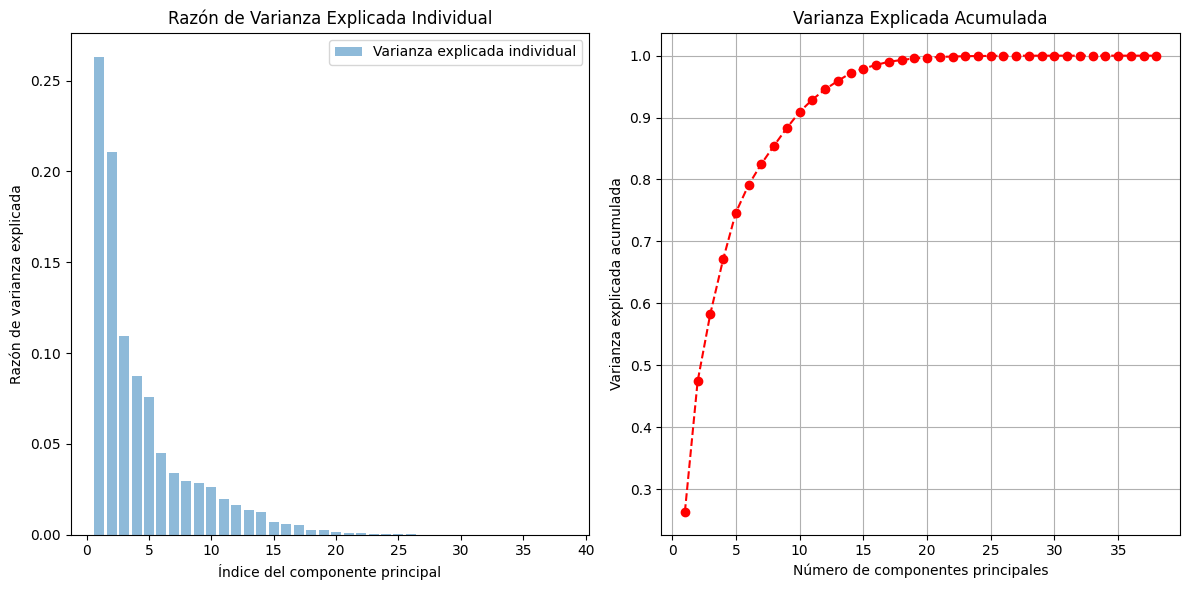

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("--- Aplicando PCA y Analizando la Varianza Explicada ---")

# Inicializar PCA
pca = PCA()

# Aplicar PCA a los datos escalados
pca.fit(df_scaled)

# Obtener la razón de varianza explicada para cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Calcular la varianza explicada acumulada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

print("Razón de varianza explicada para cada componente:")
print(explained_variance_ratio)

print("\nVarianza explicada acumulada:")
print(cumulative_explained_variance)

# Graficar la varianza explicada y la varianza explicada acumulada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza explicada individual')
plt.ylabel('Razón de varianza explicada')
plt.xlabel('Índice del componente principal')
plt.title('Razón de Varianza Explicada Individual')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='red')
plt.ylabel('Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.title('Varianza Explicada Acumulada')
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
print("--- Seleccionando Componentes Principales y Creando Nuevo DataFrame ---")

# Elegir el número de componentes basándose en la varianza explicada acumulada
# 7 componentes explican ~82.5% de la varianza
num_components = 7

# Inicializar PCA de nuevo con el número seleccionado de componentes
pca_selected = PCA(n_components=num_components)

# Ajustar PCA a los datos escalados y transformarlos
pc_data = pca_selected.fit_transform(df_scaled)

# Crear un DataFrame para los componentes principales
pc_df = pd.DataFrame(data=pc_data, columns=[f'PC_{i+1}' for i in range(num_components)])

# Combinar los componentes principales con las columnas de identificación y la variable objetivo
df_pca = pd.concat([
    df_wb_raw[['country_code', 'Country', 'NY.GDP.MKTP.PP.KD']].reset_index(drop=True),
    pc_df
], axis=1)

print(f"Se seleccionaron {num_components} componentes principales que explican el {cumulative_explained_variance[num_components-1]*100:.2f}% de la varianza.")
print("Nuevo DataFrame con componentes PCA (df_pca) forma:", df_pca.shape)
print("Primeras 5 filas del nuevo DataFrame PCA:")
print(df_pca.head())

--- Seleccionando Componentes Principales y Creando Nuevo DataFrame ---
Se seleccionaron 7 componentes principales que explican el 82.51% de la varianza.
Nuevo DataFrame con componentes PCA (df_pca) forma: (198, 10)
Primeras 5 filas del nuevo DataFrame PCA:
  country_code             Country NY.GDP.MKTP.PP.KD      PC_1      PC_2  \
0          ZWE            Zimbabwe            Medium -1.824413 -3.718461   
1          ZMB              Zambia            Medium -1.848223 -3.861049   
2          PSE  West Bank and Gaza        Medium-Low -0.841066 -0.284357   
3          VNM            Viet Nam              High  1.216174  0.301010   
4          VUT             Vanuatu               Low -1.649400 -2.790831   

       PC_3      PC_4      PC_5      PC_6      PC_7  
0 -0.139753  1.201409 -0.206234 -0.489976  0.029823  
1 -0.202842 -0.814425 -0.276063 -1.033087 -0.110543  
2 -0.042718 -0.170836  0.166311 -0.061991 -0.811369  
3  0.993765 -0.286240 -2.085039 -0.126315  1.731651  
4 -0.277981 -0.

## Summary:

### Q&A
*   **Number of components chosen:** 7 principal components were chosen.
*   **Total variance explained by chosen components:** These 7 principal components collectively explain approximately 82.51% of the total variance.

### Data Analysis Key Findings
*   38 numerical features were initially identified for PCA after excluding 'country\_code', 'Country', 'NY.GDP.MKTP.PP.KD', and 'year'.
*   All selected numerical features were successfully standardized using `StandardScaler`.
*   7 principal components were selected, as they explain approximately 82.51% of the total variance, falling within the desired 70-90% range.
*   A new DataFrame, `df_pca`, was constructed, containing the original 'country\_code', 'Country', and 'NY.GDP.MKTP.PP.KD' columns, alongside the 7 selected principal components. This DataFrame has a shape of (198, 10).

### Insights or Next Steps
*   The dimensionality reduction from 38 features to 7 principal components, while retaining over 82% of the variance, significantly simplifies the dataset for subsequent modeling or analysis, potentially reducing computational complexity and mitigating multicollinearity.
*   Further analysis can now proceed using the `df_pca` DataFrame, which contains a more compact and decorrelated representation of the original numerical features, alongside the key identifiers and target variable.
